In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Synthesize Data

In [185]:
X1 = 2*np.random.randn(1, 5000)
X2 = 5*np.random.randn(1, 5000)
X3 = np.random.randn(1, 5000)

Y=3.9*X1+1.2*np.power(X2, 2)+4.56*X3+5+np.random.randn(1, 5000)

X=np.column_stack([X1.T, X2.T, X3.T])

## Linear Regression

In [118]:
reg = LinearRegression().fit(X, Y.T)
print [reg.coef_, reg.intercept_]

[array([[3.78748979, 0.09183417, 4.2082764 ]]), array([34.44169463])]


## Mean Square Error

In [119]:
y_pred=reg.predict(X)
mean_squared_error(y_pred, Y.T)

1814.099037297171

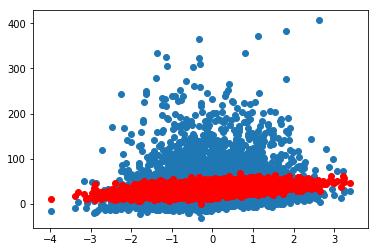

In [120]:
plt.scatter(X[:, 2], Y.T)
plt.scatter(X[:, 2], y_pred, color='r')
plt.show()

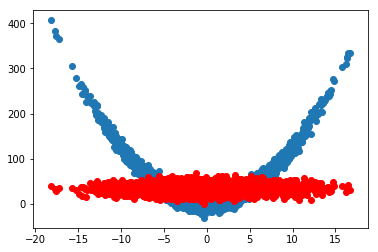

In [121]:
plt.scatter(X[:, 1], Y.T)
plt.scatter(X[:, 1], y_pred, color='r')
plt.show()

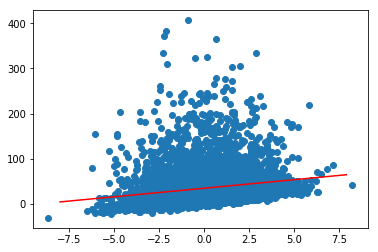

In [122]:
X_marg=np.column_stack([np.arange(-8, 8, 0.1).T, np.zeros(160).T, np.zeros(160).T])
y_marg_pred=reg.predict(X_marg)
plt.scatter(X[:, 0], Y.T)
plt.plot(X_marg[:, 0], y_marg_pred, color='r')
plt.show()

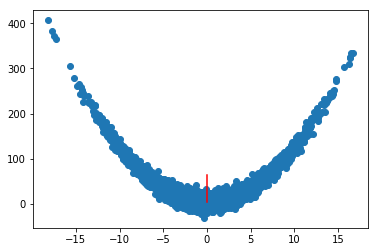

In [123]:
plt.scatter(X[:, 1], Y.T)
plt.plot(X_marg[:, 1], y_marg_pred, color='r')
plt.show()

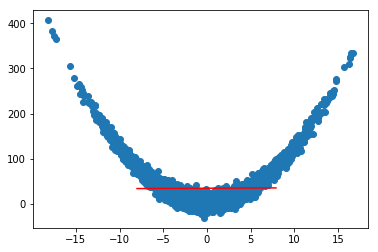

In [125]:
X_marg=np.column_stack([np.zeros(160).T, np.arange(-8, 8, 0.1).T, np.zeros(160).T])
y_marg_pred=reg.predict(X_marg)
plt.scatter(X[:, 1], Y.T)
plt.plot(X_marg[:, 1], y_marg_pred, color='r')
plt.show()

## Feature Engineer and Linear Regression

In [204]:
X_engineer=X.copy()
X_engineer[:, 1]=np.power(X[:, 1], 2)

In [205]:
reg_engineer = LinearRegression().fit(X_engineer, Y.T)

In [206]:
print [reg_engineer.coef_, reg_engineer.intercept_]

[array([[3.90277733, 1.19993445, 4.56977132]]), array([5.00327705])]


## Mean Square Error after Feature Engineer

In [207]:
y_pred_engineer=reg_engineer.predict(X_engineer)

In [208]:
mean_squared_error(y_pred_engineer, Y.T)

1.0219753448515563

In [209]:
X_marg=np.column_stack([np.zeros(160).T, np.arange(-8, 8, 0.1).T, np.zeros(160).T])
X_marg_engineer=X_marg.copy()
X_marg_engineer[:, 1]=np.power(X_marg[:, 1], 2)

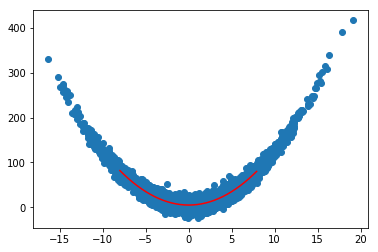

In [210]:
y_marg_engineer_pred=reg_engineer.predict(X_marg_engineer)
plt.scatter(X[:, 1], Y.T)
plt.plot(X_marg[:, 1], y_marg_engineer_pred, color='r')
plt.show()

## Cross validation

In [188]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1667 1668 1669 ... 4997 4998 4999] [   0    1    2 ... 1664 1665 1666]
[   0    1    2 ... 4997 4998 4999] [1667 1668 1669 ... 3331 3332 3333]
[   0    1    2 ... 3331 3332 3333] [3334 3335 3336 ... 4997 4998 4999]


In [186]:
Xsample = np.random.random((6, 2))
print Xsample

[[0.37478472 0.36207407]
 [0.31086954 0.80198994]
 [0.78571395 0.12779802]
 [0.07409153 0.47235016]
 [0.62023326 0.39260811]
 [0.2871754  0.49971493]]


In [187]:
np.random.shuffle(Xsample)
print Xsample

[[0.2871754  0.49971493]
 [0.07409153 0.47235016]
 [0.37478472 0.36207407]
 [0.62023326 0.39260811]
 [0.78571395 0.12779802]
 [0.31086954 0.80198994]]


In [189]:
X[train]

array([[ 2.40855903, -8.33687621, -1.00357183],
       [ 2.59028027, 10.21923036, -0.48256712],
       [-1.24626668,  4.92257991, -0.33938814],
       ...,
       [ 0.87163133,  5.26613032, -0.27737986],
       [ 0.40513691, -0.13307212,  0.7137454 ],
       [-2.7126081 ,  0.35107801, -0.14526254]])

In [224]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
y_pred_cv= np.empty((0, 1))
for train, test in kf.split(X_engineer):
    reg_engineer_cv = LinearRegression().fit(X_engineer[train], Y.T[train])
    y_pred_cv=np.append(y_pred_cv,reg_engineer_cv.predict(X_engineer[test]))

In [225]:
len(y_pred_cv)

5000

In [227]:
mean_squared_error(y_pred_cv, Y.T)

1.0242710821678895